In [239]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [240]:
data = pd.read_csv('student-mat.csv',sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [241]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [242]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [243]:
predict = 'G3'

In [244]:
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)

In [245]:
best = 0
for i in range (1000):
    X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.1)

    linear = linear_model.LinearRegression()
    linear.fit(X_train,y_train)
    acc = linear.score(X_test,y_test)
    print(acc)

if acc > best:
    best = acc
    with open('studentmodel.pickle','wb') as f:
        pickle.dump(linear,f)

0.8612004507409388
0.8223681546425996
0.8727619782928897
0.9018780466117606
0.9389539666449861
0.9203251178580024
0.7681111955739995
0.793350546413082
0.7353102997790106
0.8668629938137754
0.7494407325327676
0.8454746665716752
0.8752621417209092
0.9443979915400043
0.8703467215808778
0.7819005796270159
0.8314501673116412
0.8356042693306185
0.7739731398986611
0.8864373907999508
0.8186314613317767
0.8609627602101604
0.6731736663385293
0.7281456241090075
0.7791520490155551
0.9210929843406372
0.766905073445721
0.8540767482003258
0.8953838469522225
0.912891240454342
0.938030615689594
0.7984280630902958
0.8135684493938792
0.8902030867085315
0.8733524128141958
0.7784811827700642
0.8048344029561467
0.8088420972783535
0.8675566347931368
0.7966354098656979
0.8075102669486532
0.7314391266783278
0.8821514221688466
0.795168327884918
0.7455976717839569
0.5965239915179223
0.708844495324797
0.9082650753661519
0.8158582912386978
0.8607363585840193
0.8337638569529863
0.8994143339278418
0.8108823202490428

In [246]:
pickle_in = open('studentmodel.pickle','rb')
linear = pickle.load(pickle_in)

In [247]:
print('Co: ' , linear.coef_)
print('Intercept: ' , linear.intercept_)

Co:  [ 0.17224209  0.96781958 -0.18219811 -0.20657314  0.03564522]
Intercept:  -1.6462184949797063


In [248]:
predictions = linear.predict(X_test)

for x in range (len(predictions)):
    print(predictions[x], X_test[x],y_test[x])


                

15.619004581543653 [16 15  2  0 10] 15
9.995970702430643 [10 10  2  0 17] 10
11.870601969982722 [14 11  1  0 18] 13
8.646009720647161 [9 9 1 0 6] 10
12.737469901775412 [13 12  1  0 20] 12
4.117436262411781 [ 5  5  2  0 12] 5
8.768678552663669 [11  9  3  0 10] 10
11.751371750675942 [11 12  1  0  2] 11
13.05371948083451 [14 13  2  0  2] 13
4.901045721795958 [6 6 2 0 2] 6
7.123777144271163 [10  8  1  3  3] 7
8.220279076526337 [8 9 2 0 4] 10
7.706181147063056 [7 9 2 2 6] 8
8.148988634959137 [8 9 2 0 2] 10
7.3950403809379015 [8 8 2 0 8] 6
8.71730016221436 [9 9 1 0 8] 10
7.292076728725391 [8 8 1 0 0] 11
5.748001602470759 [7 7 4 0 4] 6
8.249940281889279 [9 9 2 0 0] 10
4.8323836162575 [8 6 2 2 2] 5
3.4237980610161323 [3 5 2 1 8] 5
12.627988836713685 [13 13  3  0  0] 14
12.142935781866976 [10 13  4  0  6] 13
11.078136566352288 [ 9 12  3  0  3] 11
12.315177870364316 [11 13  4  0  6] 14
14.56362799415935 [13 15  3  0  0] 15
10.977511445536816 [13 11  3  0  8] 11
5.522339612146565 [8 7 2 3 0] 0
15

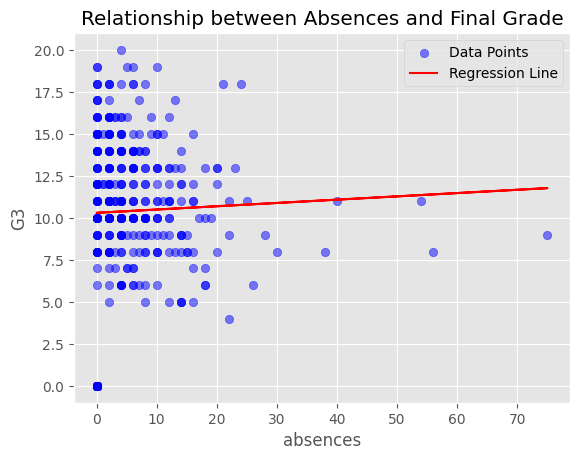

In [250]:

# Select predictor and target variables
predictor = 'absences'
target = 'G3'

# Plot data points
plt.scatter(data[predictor], data[target], alpha=0.5, color='b', label='Data Points')

# Fit a linear regression model
model = LinearRegression()
X = data[[predictor]]
y = data[target]
model.fit(X, y)

# Plot regression line
plt.plot(X, model.predict(X), color='r', label='Regression Line')

# Customize plot
plt.xlabel(predictor)
plt.ylabel(target)
plt.title('Relationship between Absences and Final Grade')
plt.legend()
plt.grid(True)

# Show plot
plt.show()
